In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, classification_report


In [4]:
import pickle

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Wine Quality Classification/model/rf_svc/'
project_folder_path = "/content/drive/MyDrive/Colab Notebooks/Wine Quality Classification/"
RANDOM_STATE = 39

In [7]:
# Loading the datset
df = pd.read_csv(project_folder_path + "WineQT.csv")

# Overview of dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [8]:
# Dimension of dataset
df.shape

(1143, 13)

In [9]:
# check data types
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [10]:
# Checking for null values if present
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [11]:
# Descriptive Stats of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [12]:
df.drop('Id', axis = 1 ,  inplace = True)

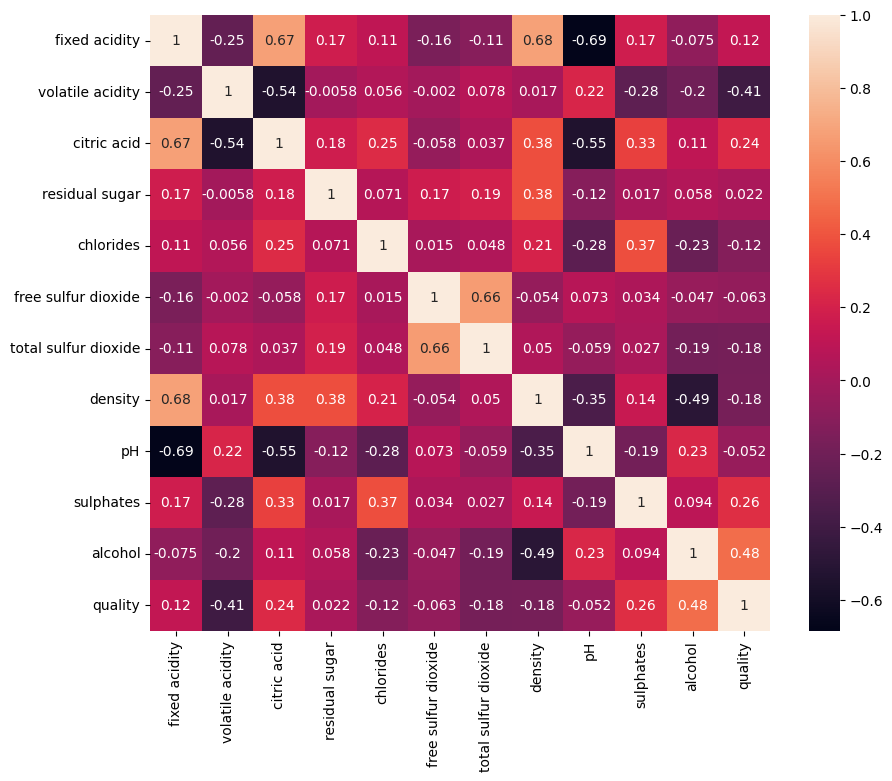

In [13]:
# Check for correlations between features in the dataset
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
df.quality.value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [15]:
def wineQualityTransform(quality):
    wine_quality_transformation = {3: 0, 4: 0, 5:1, 6:2, 7: 3, 8: 3}
    return wine_quality_transformation[quality]

df["quality"] = df["quality"].apply(wineQualityTransform)
print(df.quality.value_counts())

1    483
2    462
3    159
0     39
Name: quality, dtype: int64


In [16]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify = y)

In [18]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
83,7.3,1.070,0.09,1.7,0.178,10.0,89.0,0.99620,3.30,0.57,9.0
853,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0
133,8.9,0.310,0.57,2.0,0.111,26.0,85.0,0.99710,3.26,0.53,9.7
1012,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8
145,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8
...,...,...,...,...,...,...,...,...,...,...,...
842,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4
88,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9
838,6.7,0.640,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9
545,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6


## Transforming Data

In [19]:
log_transformed_data = np.log(X_train + 0.0001)
log_transformed_data = pd.DataFrame(log_transformed_data, columns = X.columns)
log_transformed_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
896,2.341815,-0.843738,-0.692947,0.832953,-2.686778,2.564957,2.944444,-0.003908,1.131434,-0.139147,2.433622
651,2.261774,-0.891354,-0.993982,0.832953,-2.395797,2.302595,3.135499,-0.002042,1.175604,-0.579640,2.351385
813,2.302595,-0.891354,-0.798285,1.824565,-2.643668,1.791776,2.639064,-0.002884,1.166302,-0.713146,2.468108
94,1.974095,-0.879236,-1.021374,0.693197,-2.512072,2.564957,3.806665,-0.002704,1.247061,-0.446131,2.219214
1065,1.824565,-0.430629,-2.811745,0.470066,-2.993734,1.791776,2.890377,-0.006441,1.272594,-0.616001,2.480740


In [20]:
column_names = list(X.columns)
print(len(column_names), column_names)

11 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


## Scaling data

In [21]:
scaler = RobustScaler()
scaler = scaler.fit(log_transformed_data)
scaled_data = scaler.transform(log_transformed_data)
scaled_data = pd.DataFrame(log_transformed_data, columns = X.columns)

print(scaled_data.shape, type(scaled_data))
scaled_data.head()

(914, 11) <class 'pandas.core.frame.DataFrame'>


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
896,2.341815,-0.843738,-0.692947,0.832953,-2.686778,2.564957,2.944444,-0.003908,1.131434,-0.139147,2.433622
651,2.261774,-0.891354,-0.993982,0.832953,-2.395797,2.302595,3.135499,-0.002042,1.175604,-0.579640,2.351385
813,2.302595,-0.891354,-0.798285,1.824565,-2.643668,1.791776,2.639064,-0.002884,1.166302,-0.713146,2.468108
94,1.974095,-0.879236,-1.021374,0.693197,-2.512072,2.564957,3.806665,-0.002704,1.247061,-0.446131,2.219214
1065,1.824565,-0.430629,-2.811745,0.470066,-2.993734,1.791776,2.890377,-0.006441,1.272594,-0.616001,2.480740


In [22]:
fileName = "robust_scaler.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(scaler, f)

In [23]:
def scaleAndTransform(data, scaler):
  data = np.log(data + 0.0001)
  return scaler.transform(data)

In [24]:
X_train_scaled = scaleAndTransform(data = X_train, scaler = scaler)
X_test_scaled = scaleAndTransform(data = X_test, scaler = scaler)

In [25]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
83,7.3,1.070,0.09,1.7,0.178,10.0,89.0,0.99620,3.30,0.57,9.0
853,7.2,0.360,0.46,2.1,0.074,24.0,44.0,0.99534,3.40,0.85,11.0
133,8.9,0.310,0.57,2.0,0.111,26.0,85.0,0.99710,3.26,0.53,9.7
1012,7.8,0.530,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8
145,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8
...,...,...,...,...,...,...,...,...,...,...,...
842,7.2,0.250,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4
88,8.1,1.330,0.00,1.8,0.082,3.0,12.0,0.99640,3.54,0.48,10.9
838,6.7,0.640,0.23,2.1,0.080,11.0,119.0,0.99538,3.36,0.70,10.9
545,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6


In [26]:
X_test_scaled

array([[-0.31827091,  1.45689671, -0.66313252, ..., -0.05055964,
        -0.29697805, -0.71012988],
       [-0.37384881, -0.74237383,  0.39594301, ...,  0.44828205,
         1.11442574,  0.5256803 ],
       [ 0.48025127, -1.0442327 ,  0.53518161, ..., -0.25434199,
        -0.55395752, -0.24885805],
       ...,
       [-0.66385392,  0.41921322, -0.05413635, ...,  0.25052874,
         0.42864849,  0.46943877],
       [ 0.65739388,  0.46598722,  0.02546508, ..., -0.30567825,
        -1.37553345, -0.3126762 ],
       [-0.60415905,  0.18535286, -5.08221948, ...,  0.59507625,
        -0.35949167,  0.63664556]])

## Evaluating Models

In [27]:
def compare_accurracy(model_list, model_labels, X_test, y_test):
    fig,ax1 = plt.subplots(figsize = (8,5))
    acc = []
    
    for model in model_list:
        pred = model.predict(X_test)
        pred_prob = model.predict_proba(X_test)[:,1]
        acc.append(np.round(accuracy_score(y_test, pred), 2))
    legend = []
    for i in range(len(model_list)):
        legend.append(f'{model_labels[i]}:{acc[i]}')
    scores_df = pd.DataFrame({'Models': model_labels, 'Accurracy': acc})
    scores_df.sort_values(by = 'Accurracy', inplace =True, ascending = False)
    sns.barplot(scores_df, x = 'Accurracy', y = 'Models', orient = 'h', ax = ax1, width = 0.5)
    ax1.set_title('Comparison of Classification Models')
    ax1.set_xticks(list(scores_df['Accurracy']))
    ax1.grid()
    return scores_df

## Random Forest

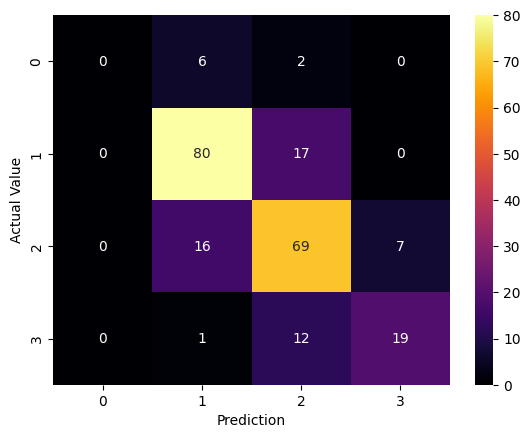


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.78      0.82      0.80        97
           2       0.69      0.75      0.72        92
           3       0.73      0.59      0.66        32

    accuracy                           0.73       229
   macro avg       0.55      0.54      0.54       229
weighted avg       0.71      0.73      0.72       229



In [57]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

cm = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(cm, annot = True, cmap = 'inferno')
plt.xlabel("Prediction")
plt.ylabel("Actual Value")
plt.show()

print()
print(classification_report(y_true = y_test, y_pred = y_pred))

In [59]:
fileName = "rf_model_73.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(rf_model, f)

## Support Vector Classifier

In [29]:
svc_model = SVC(probability = True)
svc_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [51]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## K Nearest Neighbor Classifier

In [30]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [31]:
model_list = [rf_model, svc_model, knn_model]
model_labels = ['Random Forest', 'Support Vector', 'KNN']

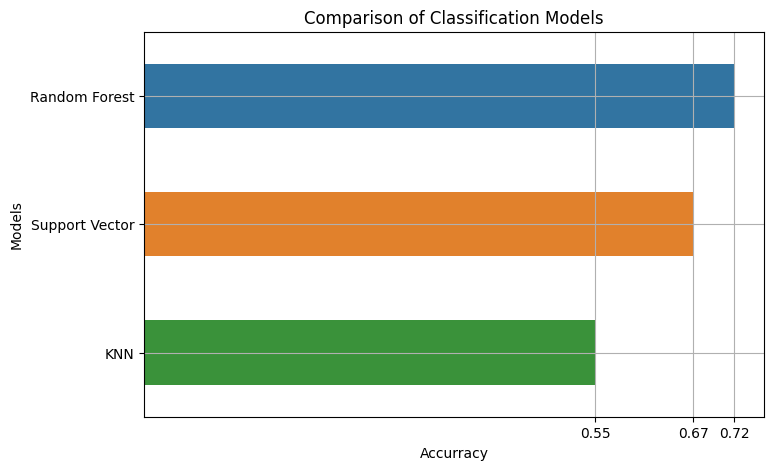

In [38]:
scores = compare_accurracy(model_list, model_labels, X_test_scaled, y_test)

In [39]:
scores

,Models,Accurracy
0,Random Forest,0.72
1,Support Vector,0.67
2,KNN,0.55


## Hyperparameters Tuning

In [40]:
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

svc_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
}


In [41]:
%%time
svc_grid = GridSearchCV(estimator = svc_model, param_grid = svc_params, cv = 5, n_jobs = -1)
svc_grid.fit(X_train_scaled, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best SVC model: ", svc_grid.best_estimator_)
print("Best set of hyperparameters: ", svc_grid.best_params_)
print("Best score: ", svc_grid.best_score_)

Best SVC model:  SVC(C=1, kernel='linear', probability=True)
Best set of hyperparameters:  {'C': 1, 'kernel': 'linear'}
Best score:  0.6038791809283612
CPU times: user 687 ms, sys: 95.5 ms, total: 783 ms
Wall time: 1min


In [42]:
%%time
rf_grid = GridSearchCV(estimator = rf_model, param_grid = rf_params, cv = 5, n_jobs = -1)
rf_grid.fit(X_train_scaled, y_train)
print("Best RandomForest model: ", rf_grid.best_estimator_)
print("Best set of hyperparameters: ", rf_grid.best_params_)
print("Best score: ", rf_grid.best_score_)

Best RandomForest model:  RandomForestClassifier(max_depth=20, n_estimators=200)
Best set of hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score:  0.6640545247102624
CPU times: user 2.92 s, sys: 167 ms, total: 3.09 s
Wall time: 2min 44s


In [43]:
best_svc_model = svc_grid.best_estimator_
best_svc_model.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear', probability=True)

In [44]:
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [45]:
model_list = [best_rf_model, best_svc_model]
model_labels = ['Random Forest', 'KNN']

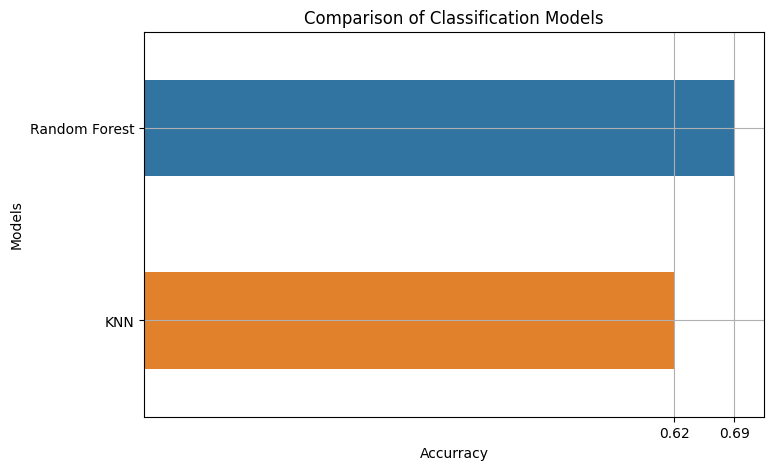

In [46]:
scores = compare_accurracy(model_list, model_labels, X_test_scaled, y_test)

In [48]:
def evaluate_model(model, X, y, labels=None):
    y_pred = model.predict(X)

    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot = True,
                fmt = 'd',
                cmap = 'Blues',
                square = True,
                cbar = False,
                xticklabels = labels,
                yticklabels = labels)
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion matrix: {model}')
    plt.show()

    print()
    print("Classification report:\n", classification_report(y, y_pred))

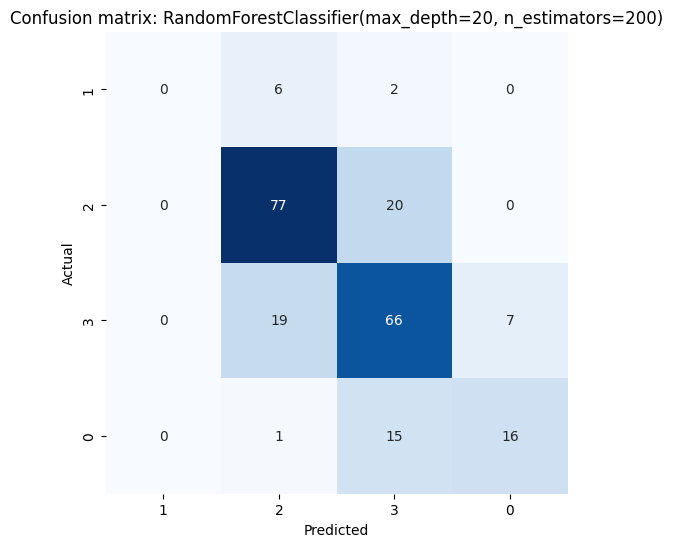


Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.75      0.79      0.77        97
           2       0.64      0.72      0.68        92
           3       0.70      0.50      0.58        32

    accuracy                           0.69       229
   macro avg       0.52      0.50      0.51       229
weighted avg       0.67      0.69      0.68       229



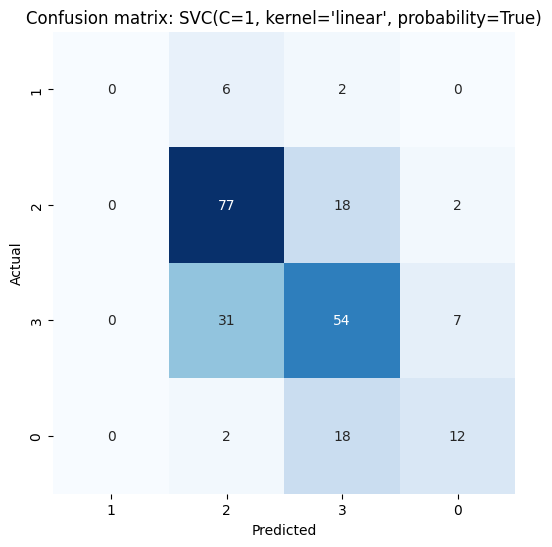


Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.66      0.79      0.72        97
           2       0.59      0.59      0.59        92
           3       0.57      0.38      0.45        32

    accuracy                           0.62       229
   macro avg       0.46      0.44      0.44       229
weighted avg       0.60      0.62      0.61       229



In [49]:
for model in model_list:   
    evaluate_model(model, X_test_scaled, y_test, y.unique())

In [ ]:
fileName = "best_rf_model.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(best_rf_model, f)

fileName = "best_svc_model.pkl"
with open(model_path + fileName, 'wb') as f:
  pickle.dump(best_svc_model, f)


## Testing with custom data

In [52]:
model_path

'/content/drive/MyDrive/Colab Notebooks/Wine Quality Classification/model/rf_svc/'

In [53]:
with open(model_path + 'robust_scaler.pkl', 'rb') as f:
  robust_scaler = pickle.load(f)

with open(model_path + 'best_rf_model.pkl', 'rb') as f:
  best_rf_model = pickle.load(f)

with open(model_path + 'best_svc_model.pkl', 'rb') as f:
  best_svc_model = pickle.load(f)

custom_data = X_test.iloc[0].values
print("custom_data : ", custom_data, type(custom_data))
custom_data = np.expand_dims(custom_data, axis = 0)

custom_data = scaleAndTransform(custom_data, scaler = robust_scaler)
print(custom_data)

print("Random forest pred : ", best_rf_model.predict_proba(custom_data))
print("SVC prediction : ", best_svc_model.predict_proba(custom_data))

custom_data :  [ 7.3     1.07    0.09    1.7     0.178  10.     89.      0.9962  3.3
  0.57    9.    ] <class 'numpy.ndarray'>
[[-0.31827091  1.45689671 -0.66313252 -0.82200279  3.23362876 -0.23881421
   0.81379818 -0.22452621 -0.05055964 -0.29697805 -0.71012988]]
Random forest pred :  [[0.19  0.46  0.345 0.005]]
SVC prediction :  [[0.04374992 0.86106457 0.09404808 0.00113743]]


In [60]:
custom_data = ['7.3', '1.07', '0.09', '1.7', '0.178', '10', '89', '0.9962', '3.3', '0.57', '9']
custom_data = list(map(float, custom_data))
print("custom_data : ", custom_data, type(custom_data))
custom_data = np.expand_dims(custom_data, axis = 0)

custom_data = scaleAndTransform(custom_data, scaler = robust_scaler)
print(custom_data)

print("Random forest pred : ", best_rf_model.predict_proba(custom_data))
print("SVC prediction : ", best_svc_model.predict_proba(custom_data))

custom_data :  [7.3, 1.07, 0.09, 1.7, 0.178, 10.0, 89.0, 0.9962, 3.3, 0.57, 9.0] <class 'list'>
[[-0.31827091  1.45689671 -0.66313252 -0.82200279  3.23362876 -0.23881421
   0.81379818 -0.22452621 -0.05055964 -0.29697805 -0.71012988]]
Random forest pred :  [[0.19  0.46  0.345 0.005]]
SVC prediction :  [[0.04374992 0.86106457 0.09404808 0.00113743]]
